# Pendulum

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos
from IPython.display import SVG

%matplotlib inline

In [2]:
def centre_axes(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

## Lagrangian dynamics
Take [Lagrangian dynamics](https://en.wikipedia.org/w/index.php?title=Lagrangian_mechanics) for granted.
- Let $U$ be the total [potential energy](https://en.wikipedia.org/wiki/Potential_energy) of the system.
- Let $T$ be the total [kinetic energy](https://en.wikipedia.org/wiki/Kinetic_energy) of the system, 
$ T = \frac{1}{2} \dot{q}^T M(q) \dot{q} = \frac{1}{2} \sum_k m_k \dot{q}^T \dot{q},\ $ where $M$ is a mass marix (inertia matrix) that depends on state $q$.
- Let $L = T - U$
- Let $Q_i$ be the [generalised force](https://en.wikipedia.org/wiki/Generalized_forces) corresponding to position $q_i$

Then the Lagrangian dynamic equations are: 
$$
    Q_i = \frac{d}{dt} \frac{\partial L}{\partial \dot{q}_i} - \frac{\partial L}{\partial q_i}
$$

## Simple pendulum

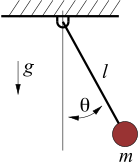

In [3]:
g = 9.81
m = 1
l = 1
SVG('./pendulum_simple.svg')

## We can derive the equations of motion for the simple pendulum
- Let the state be the single position described by the angle of the pendulum, i.e. $q = \theta$, 
- Let $p$ denote the position of $m$

$
p = l [\sin\theta, -\cos\theta ]^T  \\
\dot{p} = l \dot\theta [\cos\theta, \sin\theta]^T \\
T = \frac{1}{2} m \dot{p}^T\dot{p} = \frac{1}{2} m l^2 \dot{\theta}^2 
\ \ (\text{because } [\cos\theta, \sin\theta][\cos\theta, \sin\theta]^T) = 1\\ 
U = m g p_1 = - m g l \cos\theta \\
L = T - U = \frac{1}{2} m l^2 \dot\theta^2 + m g l \cos\theta \\
\frac{d}{dt} \frac{\partial L}{\partial \dot{q}} =
\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}} = m l^2 \ddot{\theta} \\
\frac{\partial L}{\partial q} =
\frac{\partial L}{\partial \theta} = - m g l \sin\theta \\
$

$$ Q = \frac{d}{dt} \frac{\partial L}{\partial \dot{q}} - \frac{\partial L}{\partial q} = 
       m l^2 \ddot\theta(t) + mgl\sin\theta(t) \\
$$

To be specific, consider the case where the generalized force $Q$ models a damping torque (from friction) plus a control torque input $u(t)$:
$$ Q = u(t) - b\dot{\theta}(t) $$

## What's the long-term behaviour of the pendulum?
The torque at time $t$ is $ u(t) = m l^2 \ddot\theta(t) + b\dot{\theta}(t) + mgl\sin{\theta(t)} $

Let's make two simplification:
1. Consider the case where torque $u$ is constant, i.e. does _not_ depend on time:
$$ u_0 = ml^2\ddot\theta + b \dot\theta + mgl \sin\theta $$

2. Start with the "over damped" case (using $\sqrt\frac{l}{g}$ to match units, because m has units kilograms, l is in centremetres, and b must be $\frac{cm^2 kg}{seconds}$ ): 
$$ b \sqrt\frac{l}{g} \gg ml^2 $$

In this case  $ b\dot\theta \approx u_0 - mgl\sin\theta $ and **the system is approximately first-order**.

Let's state by plotting $\dot\theta$ vs $\theta$. First, let's ignore the fact that the pendulum wraps around every $2\pi$, so we have an equation of the form $\dot x = \frac{1}{b}(u + c \sin x)$

In [4]:
def x_dot(x, u0=0, m=1, l=1, b=10):
    """Velocity of overdamped pendulum.

    Good approximation only if sqrt(l/g)*b >> m*l**2
    """
    assert b > 0, "damping must be positive"
    g = 9.81
    return (u0 - m*g*l * sin(x)) / b

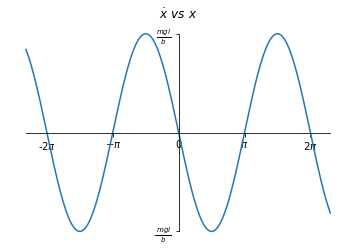

In [5]:
u = 0  # torque 
b = m*l**2 / np.sqrt(l/g)  # damping: m*l**2*theta_ddot == b*theta_dot at b = m*l**2 / sqrt(l/g)
b = b*5  # want overdamped pendulum (although plot looks same for any b>0)

x = np.arange(-2*pi-1, 2*pi+1, pi/50)
plt.plot(x, x_dot(x, m=m, l=l, b=b, u0=u))

pi_ticks = np.arange(-2*pi, 2*pi+1, pi)
pi_labels = ['-2$\pi$', '$-\pi$', '0', '$\pi$', '2$\pi$']
plt.xticks(pi_ticks, pi_labels)
plt.yticks([-m*g*l/b, m*g*l/b], [r'-$\frac{mgl}{b}$',r'$\frac{mgl}{b}$'])
plt.title(r'$\dot x \ vs \ x$')
centre_axes()

When $u=0$, $\dot x$ is just a sin wave and has "steady states" or "fixed points" ($\dot x = 0$) at $x^* \in \{..., -\pi, 0, \pi, 2\pi, ...\}$. 
- If $x(0) = x^*$, then we know $x(\infty) = x^*$. 
- What about if $x(0) = x^*+\epsilon$? 

    $x^* = \{..., -2\pi, 0, 2\pi, ...\}$ are *stable* fixed points, in the sense of Lyapunov: 
for every small $\epsilon >0$, there is a $\delta>0$ such that if $\lVert x(0)−x^∗\rVert < \delta$ then for all $t$, $\lVert x(t)−x^* \rVert < \epsilon$. $x^* = \{..., -\pi, \pi, 3\pi,...\}$ are *not* stable.


- If $\lvert u_0 \rvert > \frac{mgl}{b}$, the pendulum will turn forever 

## The undamped pendulum with no torque
Consider the same system but now with $b=0$, i.e. $$ u_0 = ml^2\ddot\theta + mgl \sin\theta $$
This is truly second-order, but we can write any (time independent) second-order system $\ddot{q} = f(q, \dot q, u)$ as as two-dimensional first-order system $\dot x_2 = f(x_1, x_2, u)$ where 
- $x_1 = [\theta, \dot \theta]^T$
- $x_2 = \dot x_1 = [\dot \theta,  \ddot \theta]^T = [\dot \theta, \frac{1}{ml^2}(u_0 - mgl \sin\theta)]^T$

This means we can plot the vectors $[ \dot x_1, \dot x_2 ]^T$ over the domain $(x_1, x_2)$

When there's no torque, $u = 0$, $x_2 = [\dot \theta, -\frac{g}{l}\sin\theta]^T$
How do we plot the vectors?

When $u = 0$, using our calculations from the start:
$T = \frac{1}{2} m l^2 \dot \theta^2, \ U = - m g l \cos\theta$ and the total energy is 
$E(\theta, \dot \theta) = T(\dot \theta) + U(\theta)$

By conservation of energy, $E(\theta(t), \dot \theta(t)) = E(\theta(t), \dot \theta(t)) = E_0$. Plugging in to the equations above and rearranging we get
$$
\frac{1}{2} m l^2 \dot \theta^2 - m g l \cos\theta = E_0 \\
\dot \theta = \pm \sqrt{\frac{2}{ml^2}[E_0 + mgl\cos\theta ]} 
$$


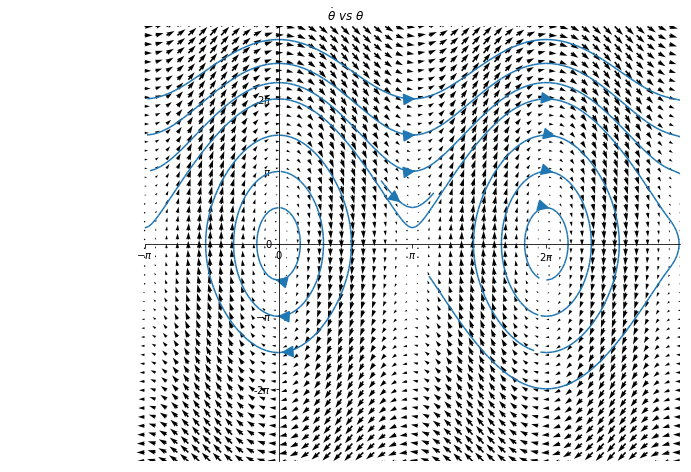

In [6]:
def energy(theta, theta_dot):
    T = 0.5*m*l**2 * theta_dot**2
    U = -m*g*l * cos(theta)
    return T + U

theta_dot, theta = np.mgrid[-3*pi:3*pi:50j, -pi:3*pi:50j]  # requires y, x ordering for unknown reason
x1_dot = np.sign(theta_dot) * np.sqrt( 2/(m*l**2) * (energy(theta, theta_dot) + m*g*l*cos(theta)))
assert(np.allclose(x1_dot, theta_dot))
x2_dot = -m*g*l * sin(theta)

plt.figure(figsize=(12,8))
plt.quiver(theta, theta_dot, x1_dot, x2_dot)
start_points = np.array(list(zip([0, 0, 0, 0, pi, pi, pi, pi, 2*pi, 2*pi, 2*pi, 2*pi],
                                 [2*pi, 1.5*pi, pi, 0.5*pi, 2*pi, 1.5*pi, pi, 0.5*pi, -2*pi, -1.5*pi, -pi, -0.5*pi])))
plt.streamplot(theta, theta_dot, x1_dot, x2_dot, arrowsize=2.5,
               start_points=start_points, density=[2,3])
plt.xticks(pi_ticks, pi_labels)
plt.yticks(pi_ticks, pi_labels)
plt.title(r'$\dot \theta \ vs \ \theta$')
centre_axes()
plt.show()

## The undamped pendulum with a constant torque

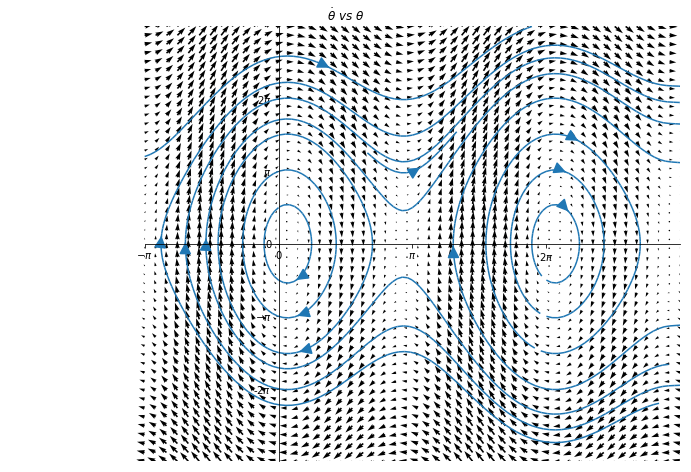

In [7]:
u = 2  # torque
x2_dot = -m*g*l * sin(theta) + u

plt.figure(figsize=(12,8))
plt.quiver(theta, theta_dot, theta_dot, x2_dot)
plt.streamplot(theta, theta_dot, x1_dot, x2_dot, arrowsize=2.5, 
               start_points=start_points, density=[2,3])
plt.xticks(pi_ticks, pi_labels)
plt.yticks(pi_ticks, pi_labels)
plt.title(r'$\dot \theta \ vs \ \theta$')
centre_axes()
plt.show()

## The damped pendulum

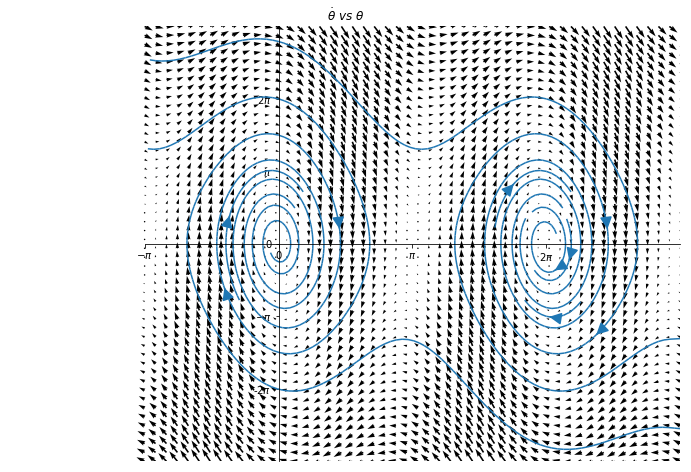

In [8]:
b = 0.5  # damping
x2_dot = -m*g*l * sin(theta) - b*theta_dot

plt.figure(figsize=(12,8))
plt.quiver(theta, theta_dot, theta_dot, x2_dot)
start_points = np.array(list(zip([0, 0, 0, 0, pi, pi, pi, pi, pi, pi, pi, pi],
                                 [2*pi, 1.5*pi, pi, 0.5*pi, 2*pi, 1.5*pi, pi, 0.5*pi, -2*pi, -1.5*pi, -pi, -0.5*pi])))
start_points = [2,1]*start_points
plt.streamplot(theta, theta_dot, x1_dot, x2_dot, arrowsize=2.5, 
               start_points=start_points, density=[2,3])
plt.xticks(pi_ticks, pi_labels)
plt.yticks(pi_ticks, pi_labels)
plt.title(r'$\dot \theta \ vs \ \theta$')
centre_axes()
plt.show()

## Pybullet pendulum

In [9]:
import gym
from gym import spaces
from gym.utils import seeding
import pybullet as p
import pybullet_data
import pybullet_envs
import time

In [12]:
# client = p.connect(p.GUI)
# p.setAdditionalSearchPath(pybullet_data.getDataPath())

In [13]:
# plane_id = p.loadURDF("plane.urdf")
# pendulum_id = p.loadMJCF("mjcf/inverted_pendulum.xml")

In [16]:
"""
Based on OpenAI Gym CartPole-v1.

A pole is attached by an un-actuated joint to a cart, 
which moves along a frictionless track. The system is
controlled by applying a force of +1 or -1 to the cart.
The pendulum starts upright, and the goal is to prevent
it from falling over. A reward of +1 is provided for 
every timestep that the pole remains upright. 
The episode ends when the pole is more than 15 degrees
from vertical, or the cart moves more than 2.4 units
from the center.
"""

'\nBased on OpenAI Gym CartPole-v1.\n\nA pole is attached by an un-actuated joint to a cart, \nwhich moves along a frictionless track. The system is\ncontrolled by applying a force of +1 or -1 to the cart.\nThe pendulum starts upright, and the goal is to prevent\nit from falling over. A reward of +1 is provided for \nevery timestep that the pole remains upright. \nThe episode ends when the pole is more than 15 degrees\nfrom vertical, or the cart moves more than 2.4 units\nfrom the center.\n'

In [18]:
class CartPoleBalanceEnv(gym.Env):
    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second' : 50
    }
    
    def __init__(self, renders=True):
        MAX_FLOAT32 = np.finfo(np.float32).max
        self.g = 9.81
        self._renders = renders
        if renders:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())

        observation_high = np.array([MAX_FLOAT32,
                                     MAX_FLOAT32,
                                     MAX_FLOAT32,
                                     MAX_FLOAT32])
        action_high = np.array([0.1])

        self.action_space = spaces.Discrete(9)
        self.observation_space = spaces.Box(-observation_high,
                                            observation_high)
        self.theta_threshold_radians = 1
        self.x_threshold = 2.4
        self.seed()
        self.viewer = None
        self.reset()
        self._configure()

    def _configure(self, display=None):
        self.display = display

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        p.stepSimulation()
        time.sleep(self.time_step)
        theta, theta_dot, x, x_dot = self.get_state()

        dv = 0.1
        actions = [-10.*dv, -5.*dv, -2.*dv, -0.1*dv, 0, 
                   0.1*dv, 2.*dv, 5.*dv, 10.*dv]
        deltav = actions[action]

        p.setJointMotorControl2(self.cartpole, 0,
                                p.VELOCITY_CONTROL,
                                targetVelocity=(x_dot + deltav))

        done =  (np.abs(x) > self.x_threshold or
                 np.abs(theta) > self.theta_threshold_radians)
        reward = 1.0

        return self.state, reward, done, {}

    def reset(self):
        p.resetSimulation()
        self.cartpole = p.loadURDF("cartpole.urdf", [0, 0, 0])
        self.time_step = 0.01

        p.setJointMotorControl2(self.cartpole, 1, p.VELOCITY_CONTROL, force=0)
        p.setGravity(0, 0, -self.g)
        p.setTimeStep(self.time_step)
        p.setRealTimeSimulation(0)

        initial_angle = self.np_random.uniform(low=-np.pi/6, high=np.pi/6, size=(1,))
        initial_cart_pos = self.np_random.uniform(low=np.pi/6, high=np.pi/6, size=(1,))
        p.resetJointState(self.cartpole, 1, initial_angle)
        p.resetJointState(self.cartpole, 0, initial_cart_pos)
        
        self.get_state()

    def get_state(self):
        """State is [theta, theta_dot, x, x_dot].
        
        Target state is [0, 0, 0, 0].
        """
        theta, theta_dot = p.getJointState(self.cartpole, 1)[0:2]
        x, x_dot = p.getJointState(self.cartpole, 0)[0:2]
        self.state = np.array([theta, theta_dot, x, x_dot])
        return self.state

    def render(self, mode='human', close=False):
          return
        
    def disconnect(self):
        p.resetSimulation()
        p.disconnect()

class CartPoleSwingupEnv(gym.Env):
    pass

In [23]:

cartpole = CartPoleBalanceEnv()
cartpole.step(4)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


(array([0.43220461, 0.08203662, 0.52359878, 0.        ]), 1.0, False, {})

In [301]:
cartpole.step(4)

(array([ 4.02171351e+00,  6.11362017e+00,  5.23598776e-01, -2.22044605e-16]),
 1.0,
 True,
 {})

In [18]:
for i in range(200):
    action = np.random.randint(cartpole.action_space.n)
    cartpole.step(action)
#     print(cartpole.state)

In [41]:
from gym.envs.classic_control import CartPoleEnv

In [42]:
pole = CartPoleEnv()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [47]:
from baselines import ddpg

In [53]:
pybullet_envs.getList()

['- CartPoleBulletEnv-v0',
 '- MinitaurBulletEnv-v0',
 '- MinitaurBulletDuckEnv-v0',
 '- RacecarBulletEnv-v0',
 '- RacecarZedBulletEnv-v0',
 '- KukaBulletEnv-v0',
 '- KukaCamBulletEnv-v0',
 '- InvertedPendulumBulletEnv-v0',
 '- InvertedDoublePendulumBulletEnv-v0',
 '- InvertedPendulumSwingupBulletEnv-v0',
 '- ReacherBulletEnv-v0',
 '- PusherBulletEnv-v0',
 '- ThrowerBulletEnv-v0',
 '- StrikerBulletEnv-v0',
 '- Walker2DBulletEnv-v0',
 '- HalfCheetahBulletEnv-v0',
 '- AntBulletEnv-v0',
 '- HopperBulletEnv-v0',
 '- HumanoidBulletEnv-v0',
 '- HumanoidFlagrunBulletEnv-v0',
 '- HumanoidFlagrunHarderBulletEnv-v0']